C:\Users\Usuario\AppData\Local\Temp\ipykernel_24960\245111060.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_rng = pd.date_range(start='1/1/2018', end='31/12/2021', freq='M')


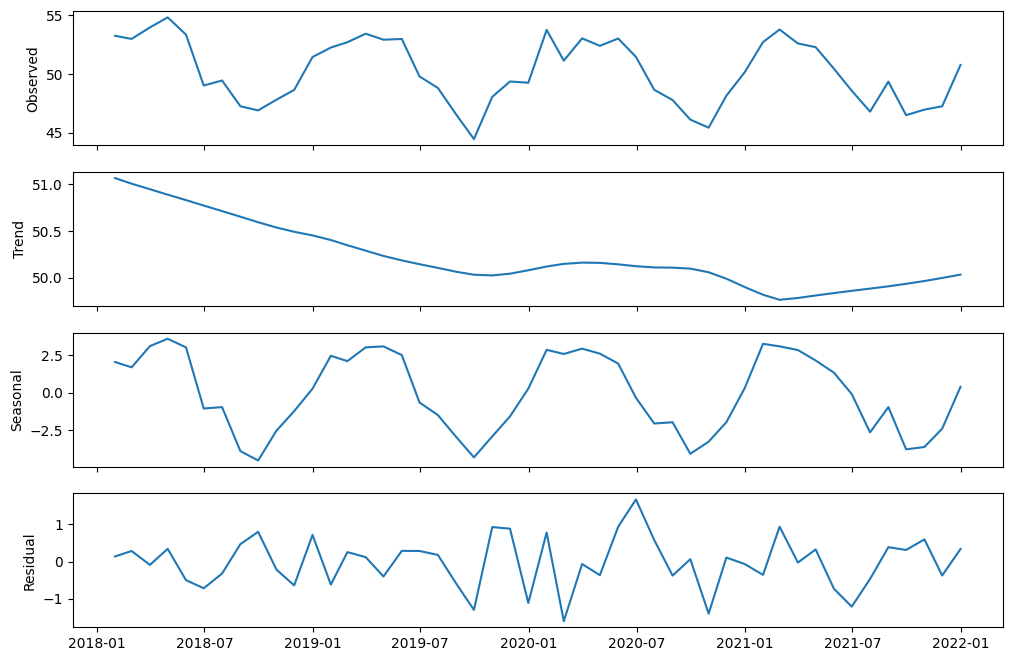

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Example time series data (monthly sales data)
np.random.seed(0)
date_rng = pd.date_range(start='1/1/2018', end='31/12/2021', freq='M')
sales_data = pd.Series(50 + 3 * np.sin(2 * np.pi * date_rng.month / 12) + np.random.normal(size=len(date_rng)), index=date_rng)

# STL decomposition
stl = STL(sales_data, seasonal=13)  # Seasonal parameter can be adjusted based on the data
result = stl.fit()

# Plotting the components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
ax1.plot(result.observed)
ax1.set_ylabel('Observed')
ax2.plot(result.trend)
ax2.set_ylabel('Trend')
ax3.plot(result.seasonal)
ax3.set_ylabel('Seasonal')
ax4.plot(result.resid)
ax4.set_ylabel('Residual')
plt.show()

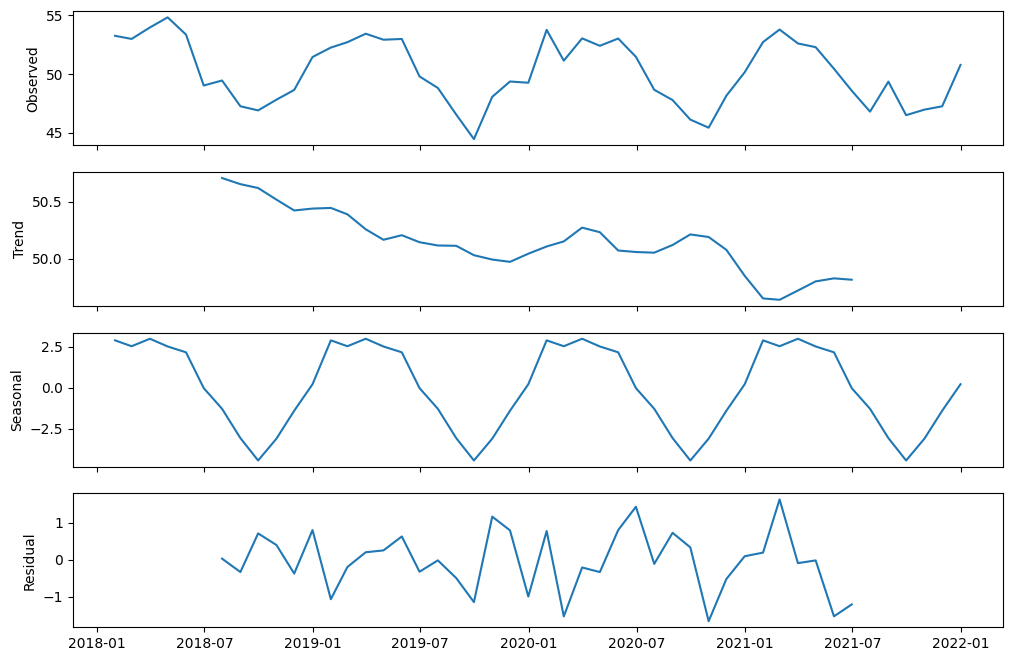

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Classical decomposition
decomposition = seasonal_decompose(sales_data, model='additive', period=12)

# Plotting the components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')
ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')
ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')
ax4.plot(decomposition.resid)
ax4.set_ylabel('Residual')
plt.show()


<Figure size 1400x700 with 0 Axes>

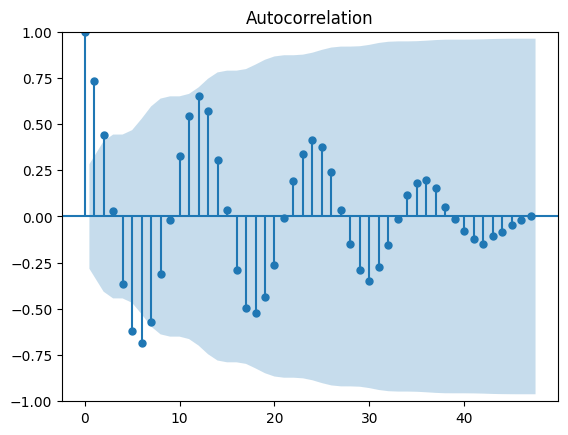

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(14, 7))
plot_acf(sales_data, lags=47)
plt.show()


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from backend.data_processing_service import DataProcessingService
from backend.model_service import ModelService, LinRegNN

#CONFIG
log_wandb = False

# Initialize DataProcessingService
data_processor = DataProcessingService(seq_length=36, pred_window=12, batch_size=6)
data = np.loadtxt('data/normalized_apple_prices.csv')
# data = data_processor.get_sample_data(length=50)

# Normalize the data
# data_normalized, scaler = data_processor.normalize_data(data)
